In [92]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

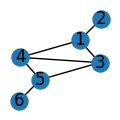

In [28]:
figsize=(1, 1)
fig = plt.figure(figsize=figsize)
G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5), (5, 6)])

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

# Definitions

## Definition 1 - Partition of A

A set $A = A_1,..,A_k$ of disjoint subsets of a set $A$ is a parition of $A$ if $\cup A$ of all sets $A_i$ and $A \neq\emptyset$ for every i.

In [26]:
A = {1, 2, 3, 4, 5, 6} 

A_1 = {1, 2}
A_2 = {3, 4}
A_3 = {5, 6}

A == A_1 | A_2 | A_3

True

## Definition 2 - Vertex set

The set of vertices in a graph denoted by $V(G)$.

Vertex set V(G) = {1, 2, 3, 4, 5, 6}


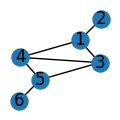

In [36]:
fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

print(f'Vertex set V(G) = {set(G.nodes)}')

## Definition 3 - Edge set

The set of edges in a graph denoted by $E(G)$.

Edge set E(G) = {(1, 2), (1, 3), (4, 5), (5, 6), (1, 4), (3, 4), (3, 5)}


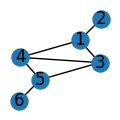

In [38]:
fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

print(f'Edge set E(G) = {set(G.edges)}')

## Definition 4 - Order

The number of vertices in a graph denoted by $|V|$.

Order |V| = 6


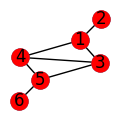

In [57]:
order = G.order()
assert order == len(G.nodes)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=G.nodes, node_size=150, node_color='red')

print(f'Order |V| = {order}')

## Definition 5 - Size

The number of edges in a graph denoted by $|E|$.

Order |V| = 7


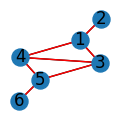

In [60]:
size = G.size()
assert size == len(G.edges)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, edge_color='red')

print(f'Order |V| = {size}')

## Definition 5 - Incident

A vertex $v$ is incident with an edge $e$ if $v \in e$ then $e$ is an edge at $v$. 

Incident edges for v_1  = [(1, 2), (1, 3), (1, 4)]


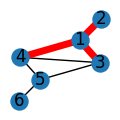

In [133]:
node = 1
incident_edges = G.edges(node)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=incident_edges, edge_color='red', width=5)

print(f'Incident edges for v_{node}  = {incident_edges}')

### Incidence matrix

The incidence matrix is a matrix in which each row of the matrix corresponds to a vertex in the graph, and each column corresponds to an edge. The entry in row i and column j is 1 if vertex i is incident to edge j, and 0 otherwise. In directed graphs, the entries can be either 1, -1 or 0, depending on the direction of the edge.

In [53]:
incidence_matrix = nx.incidence_matrix(G)

assert incidence_matrix.shape[0] == G.order()
assert incidence_matrix.shape[1] == G.size()

print(f'Incident matrix:\n{incidence_matrix.todense()}')

Incident matrix:
[[1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


## Definition 6 - Adjacent

Two vertices $x$,$y$ of $G$ are adjacent if $xy$ is is an edge of $G$.

Adjacent edges for v_1  = [(1, 2), (1, 3), (1, 4)]


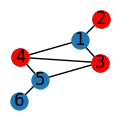

In [83]:
node = 1
adjacent_nodes = list(G.adj[node].keys())

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=adjacent_nodes, node_size=150, node_color='red')

# Check if vertices 1, 3 are adjacent.
assert G.has_edge(1, 3)
# Check if vertices 1, 6 are not adjacent.
assert G.has_edge(1, 6) == False

print(f'Adjacent edges for v_{node}  = {incident_edges}')

### Adjacency matrix

An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

In [109]:
print(f'Adjency matrix:\n{nx.adjacency_matrix(G).todense()}')

Adjency matrix:
[[0 1 1 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 1 1 0]
 [1 0 1 0 1 0]
 [0 0 1 1 0 1]
 [0 0 0 0 1 0]]


## Definition 7 - Complete

If all vertices of G are pairwise adjacent thet $G$ is complete.

Adjency matrix:
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


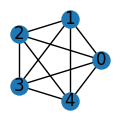

In [108]:
# Generate complete graph C
order = 5
C = nx.complete_graph(order)

fig = plt.figure(figsize=figsize)
nx.draw(C, pos=nx.kamada_kawai_layout(C), node_size=150, with_labels=True)

print(f'Adjency matrix:\n{nx.adjacency_matrix(C).todense()}')

### Examples of completed graphs

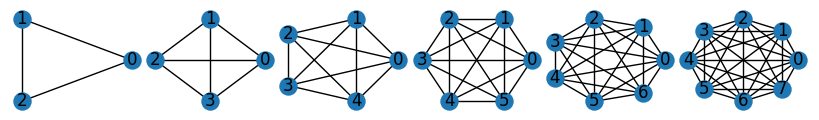

In [123]:
fig, axis = plt.subplots(nrows=1, ncols=6, figsize=(8, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i, order in enumerate(range(3, 9)):
    C = nx.complete_graph(order)
    nx.draw(C, pos=nx.kamada_kawai_layout(C), node_size=150, with_labels=True, ax=axis[i]);

## Defintion 8 - Independent

A set of vertices or edges is independent if no two of its elements are adjacent. 

### Node independent

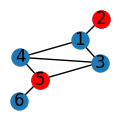

In [126]:
assert G.has_edge(2, 5) == False

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=[2, 5], node_size=150, node_color='red');

### Edge independent

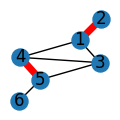

In [136]:
assert (4, 5) not in G.edges(1)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=[(4, 5), (1, 2)], edge_color='red', width=5);

## Definition 9 - Isomorphic 

We call $G$ and $H$ isomorphic and write $G \simeq H$ if there exists a bijections $\phi: V \to V^{\prime}$ with $xy \in E \Longleftrightarrow \phi(x)\phi(y) \in E^{\prime}$ for all $x,y$ in $V$. 

In [138]:
nx.is_isomorphic(G, G)

True

# IN PROGRESS